<a href="https://colab.research.google.com/github/ramiredddy/CROP-PRICE-PREDICTION/blob/main/MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [3]:
import io
crop = pd.read_csv(io.BytesIO(uploaded['Dataset.csv']))

In [4]:
crop.head()

,Area,Production,GDP,Annual Growth Rate (%),Inflation,Rainfall,Price,Temparature
0,102,321,33668,0.0030,0.0401,2763.2,1139,26.60
1,83,300,34352,0.0186,0.0378,3080.9,864,26.85
2,189,511,35796,0.0430,0.0430,2620.2,964,27.00
3,52,90,41572,0.1608,0.0381,2355.9,945,27.30
4,53,73,47728,0.1482,0.0377,2460.1,1309,27.35


In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15104 entries, 0 to 15103
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    15104 non-null  int64  
 1   Production              15104 non-null  int64  
 2   GDP                     15104 non-null  int64  
 3   Annual Growth Rate (%)  15104 non-null  float64
 4   Inflation               15104 non-null  float64
 5   Rainfall                15104 non-null  float64
 6   Price                   15104 non-null  int64  
 7   Temparature             14396 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 944.1 KB


In [6]:
crop['Price'].value_counts()

,count
Price,
1009,1701
1284,939
1094,923
1309,895
1030,866
1494,866
1139,861
1575,856
1110,850


In [7]:
crop['Area'].value_counts()

,count
Area,
1000,136
2000,69
1,62
3000,56
2,44
...,...
45158,1
45729,1
46036,1


In [8]:
crop.describe()

,Area,Production,GDP,Annual Growth Rate (%),Inflation,Rainfall,Price,Temparature
count,15104.000000,1.510400e+04,15104.000000,15104.000000,15104.000000,15104.000000,15104.000000,14396.000000
mean,49465.391817,1.062944e+05,69083.542108,0.089930,0.072745,1615.374378,1159.730535,24.894815
std,68790.684941,1.738664e+05,31723.555039,0.087498,0.031243,938.528063,205.872234,3.075868
min,1.000000,0.000000e+00,31388.000000,-0.029000,0.037700,0.000000,864.000000,12.210000
25%,3298.750000,4.964750e+03,35796.000000,0.004000,0.042500,926.500000,968.000000,23.940000
50%,18888.000000,3.041250e+04,61332.000000,0.074100,0.066500,1291.900000,1110.000000,25.760000
75%,72741.750000,1.350475e+05,103208.000000,0.148200,0.093100,2372.200000,1309.000000,26.750000
max,687000.000000,1.710000e+06,122056.000000,0.274700,0.132300,4229.400000,1575.000000,30.500000


In [9]:
%matplotlib inline

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Production'}>,
        <Axes: title={'center': 'GDP'}>],
       [<Axes: title={'center': 'Annual Growth Rate (%)'}>,
        <Axes: title={'center': 'Inflation'}>,
        <Axes: title={'center': 'Rainfall'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Temparature'}>, <Axes: >]], dtype=object)

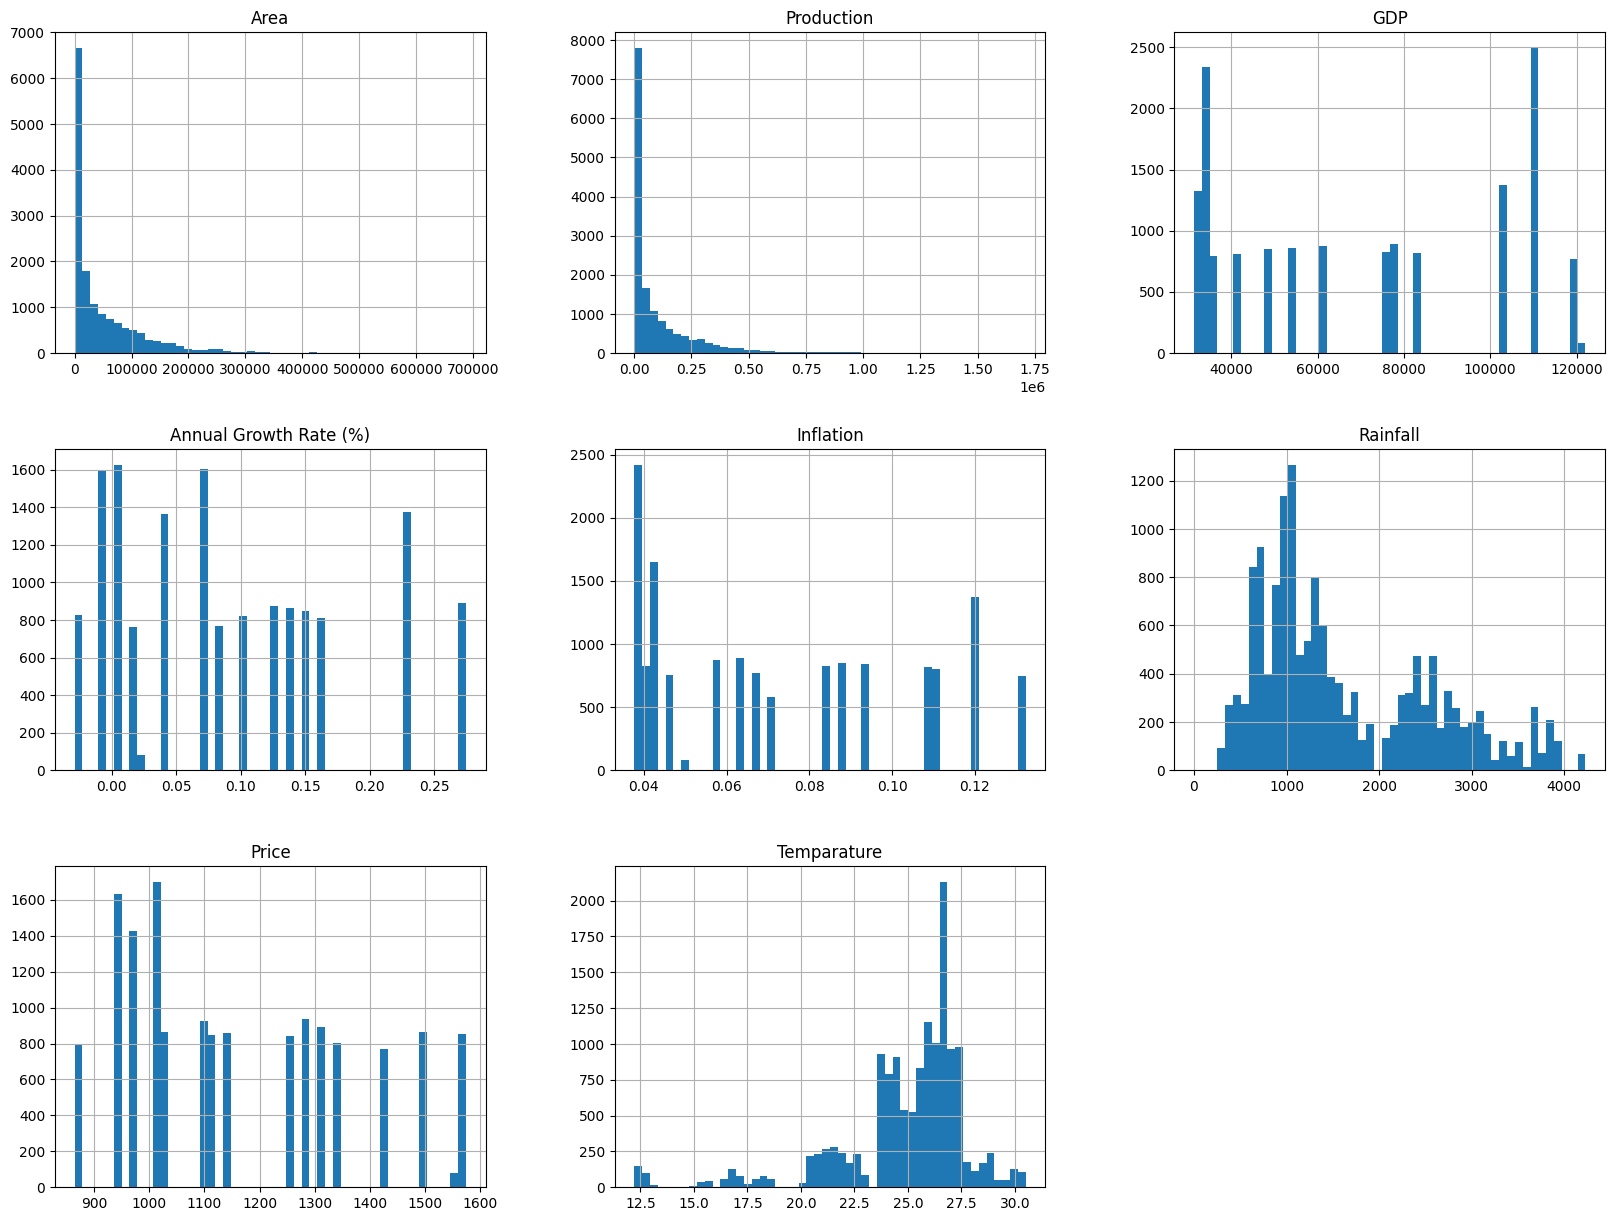

In [11]:

import matplotlib.pyplot as plt
crop.hist(bins=50, figsize=(20, 15))

In [12]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(crop, 0.2)

[ 8649  5563 10148 ...  5390   860  7270]


In [14]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 12084
Rows in test set: 3020



In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(crop, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 12083
Rows in test set: 3021



In [16]:
crop.replace([np.inf, -np.inf], np.nan, inplace=True)

In [17]:
crop.fillna(999, inplace=True)

In [18]:

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(crop, crop['Price']):
    strat_train_set = crop.loc[train_index]
    strat_test_set = crop.loc[test_index]
strat_train_set['Temparature'].value_counts()

,count
Temparature,
999.00,568
26.71,175
26.75,152
25.90,142
26.70,139
...,...
25.91,1
26.25,1
25.70,1
